In [1]:
11+11

22

In [2]:
import pandas as pd

# Read the Excel file
excel_file = 'final_data.xlsx'
df = pd.read_excel(excel_file)

# Convert to CSV
csv_file = 'Fibal_data.csv'
df.to_csv(csv_file, index=False)


In [3]:
# Read the CSV file
df = pd.read_csv(csv_file)

# Display the first 5 rows
df.head()

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID,Operating_System,Software_Component,Version,Impact,Affected_Hardware,Network_Requirements,Affected_Protocols,Authentication_Required,Privileges_Required,User_Interaction_Required,Vendor
0,1,CVE-1999-0001,NaN,5.0,MEDIUM,ip_input.c in BSD-derived TCP/IP implementatio...,CWE-20,BSD-derived,ip_input.c,NaN,denial of service (crash or hang),NaN,remote,TCP/IP,NaN,NaN,NaN,NaN
1,2,CVE-1999-0002,NaN,10.0,HIGH,Buffer overflow in NFS mountd gives root acces...,CWE-119,Linux,NFS mountd,NaN,root access,NaN,remote,NFS,NaN,NaN,NaN,NaN
2,3,CVE-1999-0003,NaN,10.0,HIGH,Execute commands as root via buffer overflow i...,NVD-CWE-Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CVE-1999-0004,NaN,5.0,MEDIUM,"MIME buffer overflow in email clients, e.g. So...",NVD-CWE-Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,CVE-1999-0005,NaN,10.0,HIGH,Arbitrary command execution via IMAP buffer ov...,NVD-CWE-Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display the last 5 rows
df.tail()

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID,Operating_System,Software_Component,Version,Impact,Affected_Hardware,Network_Requirements,Affected_Protocols,Authentication_Required,Privileges_Required,User_Interaction_Required,Vendor
11494,11495,CVE-2021-0607,7.8,4.6,HIGH,"In iaxxx_calc_i2s_div of iaxxx-codec.c, there ...",CWE-119,Android,Android kernel,NaN,local escalation of privilege,NaN,NaN,NaN,NaN,no additional execution privileges needed,NaN,NaN
11495,11496,CVE-2021-0608,7.8,4.6,HIGH,"In handleAppLaunch of AppLaunchActivity.java, ...",CWE-610,Android,Android kernel,A-174870704,local escalation of privilege,NaN,NaN,NaN,NaN,no additional execution privileges needed,no,NaN
11496,11497,CVE-2021-0610,7.8,4.6,HIGH,"In memory management driver, there is a possib...",CWE-190,NaN,memory management driver,NaN,local escalation of privilege,NaN,NaN,NaN,NaN,NaN,No,NaN
11497,11498,CVE-2021-0611,7.8,4.6,HIGH,"In m4u, there is a possible memory corruption ...",CWE-416,NaN,m4u,NaN,local escalation of privilege,NaN,NaN,NaN,NaN,System execution privileges,No,NaN
11498,11499,CVE-2021-0612,7.8,4.6,HIGH,"In m4u, there is a possible memory corruption ...",CWE-416,NaN,m4u,NaN,local escalation of privilege,NaN,NaN,NaN,NaN,System execution privileges,No,NaN


In [11]:
mask = df.apply(lambda row: row.astype(str).str.contains(r'[^"]"[^"]'), axis=1)
problematic_rows = df[mask]

# Display the problematic rows for review
print("Rows with unescaped quotes:")
print(problematic_rows)


Rows with unescaped quotes:
       ID CVE-ID  CVSS-V3  CVSS-V2 SEVERITY CWE-ID Operating_System  \
0     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
1     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
2     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
3     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
4     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
...    ..    ...      ...      ...      ...    ...              ...   
11494 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11495 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11496 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11497 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11498 NaN    NaN      NaN      NaN      NaN    NaN              NaN   

      Software_Component Version Impact Affected_Hardware  \
0                    NaN     NaN    NaN               NaN 

In [12]:
count = 0
for index, row in problematic_rows.iterrows():
    for i, value in row.items():
        if '"' in str(value):
            count += 1
            print(f"Row {index}, Column {i}: {value}")

print(f"Total number of unescaped quotes: {count}")

Total number of unescaped quotes: 0


In [8]:
# delete the problematic rows
df = df[~mask]

# Save the cleaned data to a new CSV file
cleaned_csv_file = 'cleaned_final_data.csv'
df.to_csv(cleaned_csv_file, index=False)


In [9]:
# Drop description column
df = df.drop(columns=['DESCRIPTION'])

# Save the cleaned data to a new CSV file
cleaned_csv_file = 'cleaned1_final_data.csv'
df.to_csv(cleaned_csv_file, index=False)


In [14]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("cleaned1_final_data.csv")

# Check rows with embedded or unbalanced quotes
mask = df.apply(lambda row: row.astype(str).str.contains(r'".*".*".*'), axis=1)
problematic_rows = df[mask]

# Display problematic rows for manual inspection
print("Rows with potentially problematic quotes:")
print(problematic_rows)

# Optional: Print the specific row with the ID (e.g., index 3119) if necessary
print(df.iloc[3119])  # Print the specific row to inspect

# Correct issues by escaping quotes or removing problematic rows
df = df.replace({r'"([^"]*)"$': r'\1'}, regex=True)  # Replace improperly closed quotes


Rows with potentially problematic quotes:
       ID CVE-ID  CVSS-V3  CVSS-V2 SEVERITY CWE-ID Operating_System  \
0     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
1     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
2     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
3     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
4     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
...    ..    ...      ...      ...      ...    ...              ...   
11494 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11495 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11496 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11497 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11498 NaN    NaN      NaN      NaN      NaN    NaN              NaN   

      Software_Component Version Impact Affected_Hardware  \
0                    NaN     NaN    NaN     

In [15]:
# Option 1: Remove rows with improperly quoted strings
df = df[~mask]  # Removes rows with unbalanced quotes

# Option 2: Escape embedded quotes in the entire DataFrame
df = df.applymap(lambda x: x.replace('"', '\"') if isinstance(x, str) else x)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21724\3668364494.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '\"') if isinstance(x, str) else x)


In [16]:
# Save the cleaned DataFrame
mask = df.apply(lambda row: row.astype(str).str.contains(r'".*".*".*'), axis=1)
problematic_rows = df[mask]

# Display problematic rows for manual inspection
print("Rows with potentially problematic quotes:")
print(problematic_rows)

Rows with potentially problematic quotes:
       ID CVE-ID  CVSS-V3  CVSS-V2 SEVERITY CWE-ID Operating_System  \
0     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
1     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
2     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
3     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
4     NaN    NaN      NaN      NaN      NaN    NaN              NaN   
...    ..    ...      ...      ...      ...    ...              ...   
11494 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11495 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11496 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11497 NaN    NaN      NaN      NaN      NaN    NaN              NaN   
11498 NaN    NaN      NaN      NaN      NaN    NaN              NaN   

      Software_Component Version Impact Affected_Hardware  \
0                    NaN     NaN    NaN     

In [17]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("cleaned1_final_data.csv")

# Step 1: Drop rows where all columns are NaN
df.dropna(how="all", inplace=True)

# Step 2: Remove leading and trailing whitespace and fix any embedded quotes
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove extra spaces
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)  # Remove embedded quotes

# Step 3: Inspect the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())



C:\Users\lenovo\AppData\Local\Temp\ipykernel_21724\1711239679.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove extra spaces
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21724\1711239679.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)  # Remove embedded quotes


Cleaned DataFrame:
   ID         CVE-ID  CVSS-V3  CVSS-V2 SEVERITY         CWE-ID  \
0   1  CVE-1999-0001      NaN      5.0   MEDIUM         CWE-20   
1   2  CVE-1999-0002      NaN     10.0     HIGH        CWE-119   
2   3  CVE-1999-0003      NaN     10.0     HIGH  NVD-CWE-Other   
3   4  CVE-1999-0004      NaN      5.0   MEDIUM  NVD-CWE-Other   
4   5  CVE-1999-0005      NaN     10.0     HIGH  NVD-CWE-Other   

  Operating_System Software_Component Version  \
0      BSD-derived         ip_input.c     NaN   
1            Linux         NFS mountd     NaN   
2              NaN                NaN     NaN   
3              NaN                NaN     NaN   
4              NaN                NaN     NaN   

                              Impact Affected_Hardware Network_Requirements  \
0  denial of service (crash or hang)               NaN               remote   
1                        root access               NaN               remote   
2                                NaN               N

In [18]:
# Check for any rows that are entirely NaN
all_nan_rows = df[df.isna().all(axis=1)]
print(f"Number of rows with all NaN values: {len(all_nan_rows)}")

# Check for any NaN values in important columns (like 'CVE-ID' or 'SEVERITY')
critical_columns = ['CVE-ID', 'SEVERITY']  # Update based on columns you consider essential
nan_critical = df[critical_columns].isna().any()
print("NaN values in critical columns:")
print(nan_critical)


Number of rows with all NaN values: 0
NaN values in critical columns:
CVE-ID      False
SEVERITY     True
dtype: bool


In [19]:
# Fill NaN values in SEVERITY with a default value
df['SEVERITY'].fillna("UNKNOWN", inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21724\940271823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SEVERITY'].fillna("UNKNOWN", inplace=True)


In [20]:
# Drop rows where SEVERITY is NaN
df.dropna(subset=['SEVERITY'], inplace=True)


In [21]:
# Fill NaN in SEVERITY with the most frequent value
most_common_severity = df['SEVERITY'].mode()[0]
df['SEVERITY'].fillna(most_common_severity, inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21724\1502360915.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SEVERITY'].fillna(most_common_severity, inplace=True)


In [22]:
# Check for any remaining NaN in SEVERITY
print("Remaining NaN in SEVERITY:", df['SEVERITY'].isna().sum())


Remaining NaN in SEVERITY: 0


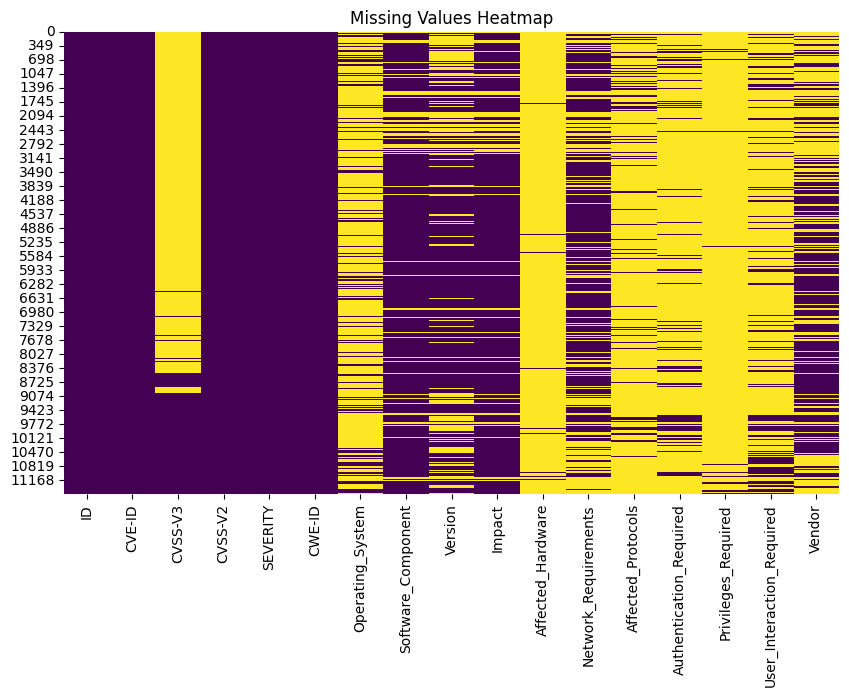

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [24]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [25]:
# Identify rows with unescaped or embedded quotes
quote_issues = df.applymap(lambda x: '"' in x if isinstance(x, str) else False)
problematic_rows = df[quote_issues.any(axis=1)]
print(f"Number of rows with problematic quotes: {len(problematic_rows)}")


Number of rows with problematic quotes: 0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21724\1269154106.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  quote_issues = df.applymap(lambda x: '"' in x if isinstance(x, str) else False)


In [26]:
# Check data types
print("Data types:")
print(df.dtypes)


Data types:
ID                             int64
CVE-ID                        object
CVSS-V3                      float64
CVSS-V2                      float64
SEVERITY                      object
CWE-ID                        object
Operating_System              object
Software_Component            object
Version                       object
Impact                        object
Affected_Hardware             object
Network_Requirements          object
Affected_Protocols            object
Authentication_Required       object
Privileges_Required           object
User_Interaction_Required     object
Vendor                        object
dtype: object


In [27]:
# General summary of the DataFrame
print("DataFrame Summary:")
print(df.info())


DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         11499 non-null  int64  
 1   CVE-ID                     11499 non-null  object 
 2   CVSS-V3                    3027 non-null   float64
 3   CVSS-V2                    11498 non-null  float64
 4   SEVERITY                   11499 non-null  object 
 5   CWE-ID                     11499 non-null  object 
 6   Operating_System           2348 non-null   object 
 7   Software_Component         9821 non-null   object 
 8   Version                    7607 non-null   object 
 9   Impact                     9689 non-null   object 
 10  Affected_Hardware          219 non-null    object 
 11  Network_Requirements       7472 non-null   object 
 12  Affected_Protocols         1519 non-null   object 
 13  Authentication_Required    

In [28]:
# Save the cleaned data to a new CSV file
df.to_csv("cleaned_final_data_v2.csv", index=False)